In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data import and wrangling

In [2]:
xls_file = pd.ExcelFile('1553768847_housing.xlsx') #reading in the excel file
xls_file

<ipython-input-2-b621e50f7ce0>:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  xls_file = pd.ExcelFile('1553768847_housing.xlsx') #reading in the excel file


In [3]:
xls_file.sheet_names

['housing']

In [4]:
df = xls_file.parse('housing') #loading the dataset as a dataframe
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [7]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
df1 = df[:]
df1 = pd.get_dummies(df, columns = ['ocean_proximity']) #creating a categorical variable for ocean proximity
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  int64  
 3   total_rooms                 20640 non-null  int64  
 4   total_bedrooms              20433 non-null  float64
 5   population                  20640 non-null  int64  
 6   households                  20640 non-null  int64  
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  int64  
 9   ocean_proximity_<1H OCEAN   20640 non-null  uint8  
 10  ocean_proximity_INLAND      20640 non-null  uint8  
 11  ocean_proximity_ISLAND      20640 non-null  uint8  
 12  ocean_proximity_NEAR BAY    20640 non-null  uint8  
 13  ocean_proximity_NEAR OCEAN  206

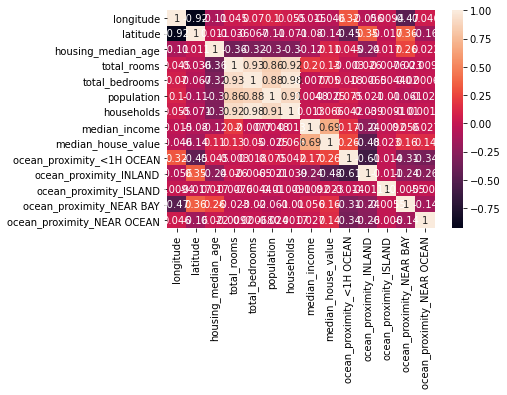

In [10]:
sns.heatmap(df1.corr(), annot=True); #exploring variable relationships

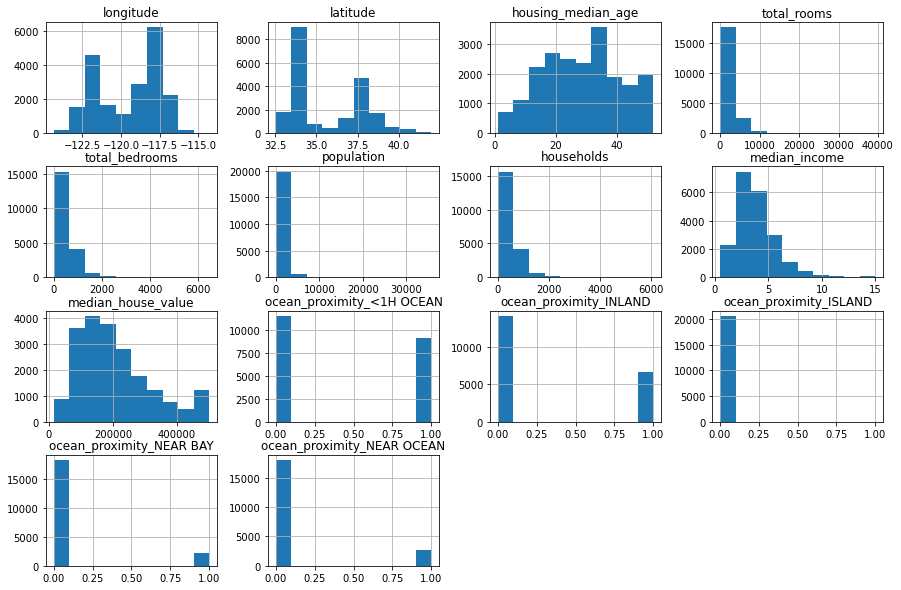

In [11]:
df1.hist(figsize=(15,10));

In [12]:
df1.isnull().any() #checking for missing values

longitude                     False
latitude                      False
housing_median_age            False
total_rooms                   False
total_bedrooms                 True
population                    False
households                    False
median_income                 False
median_house_value            False
ocean_proximity_<1H OCEAN     False
ocean_proximity_INLAND        False
ocean_proximity_ISLAND        False
ocean_proximity_NEAR BAY      False
ocean_proximity_NEAR OCEAN    False
dtype: bool

In [13]:
df1.isnull().sum() #207 missing values for bedrooms

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                207
population                      0
households                      0
median_income                   0
median_house_value              0
ocean_proximity_<1H OCEAN       0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64

In [14]:
df1['total_bedrooms'] = df1['total_bedrooms'].fillna(df1['total_bedrooms'].mean()) #filling in the missing values with mean
df1.isnull().any()

longitude                     False
latitude                      False
housing_median_age            False
total_rooms                   False
total_bedrooms                False
population                    False
households                    False
median_income                 False
median_house_value            False
ocean_proximity_<1H OCEAN     False
ocean_proximity_INLAND        False
ocean_proximity_ISLAND        False
ocean_proximity_NEAR BAY      False
ocean_proximity_NEAR OCEAN    False
dtype: bool

In [15]:
df1 = df1.drop(['longitude', 'latitude'], axis=1) #dropping columns not relevant
df1.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


In [16]:
df1.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.442636,0.317393,0.000242,0.110950,0.128779
std,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874,0.496710,0.465473,0.015563,0.314077,0.334963
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Multivariate Linear Regression Model

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() 

In [18]:
x = df1.drop(['median_house_value'],axis=1) #getting the input and output variables in place
y = df1['median_house_value']

In [19]:
#time to scale the data

x_scaled = sc.fit_transform(x.values)
y_scaled = sc.fit_transform(y.values.reshape(-1,1)).flatten()

In [20]:
#splitting into training and test sets

from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=1)

In [21]:
#constructing a linear regression object

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [22]:
#fitting the training data into the model

lr.fit(x_train, y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(x_test) #getting some predicted values
y_pred

array([ 0.3193564 , -0.97684969,  0.31662211, ...,  0.60088371,
        0.5984482 , -0.63676455])

In [24]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#checking the test and training scores

print("The test score is: ", r2_score(y_test, y_pred))
print("The training score is: ", r2_score(y_train, lr.predict(x_train)))

The test score is:  0.6256130997002793
The training score is:  0.6355305942670978


In [25]:
#checking the mean squared and absolute mean errors

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"The mean squared error is: {mse}")
print(f"The mean absolute error is: {mae}")

The mean squared error is: 0.3688030929379477
The mean absolute error is: 0.43635784054074533


In [26]:
#Cross validation

from sklearn.model_selection import cross_val_score

cross_val_score(lr, x_train, y_train, cv= 10)

array([0.61427271, 0.64145101, 0.64773055, 0.64322375, 0.6087096 ,
       0.63861069, 0.64889544, 0.63324441, 0.62878129, 0.63175748])

In [27]:
#Test score on cross validation

cv_score = r2_score(y_test, lr.predict(x_test))
print(f"The cross validation test score is {cv_score}")

The cross validation test score is 0.6256130997002793


In [28]:
#Getting the coefficients that influence median house values

pd.DataFrame(lr.coef_, index = x.columns, columns = ['Coefficients']).sort_values(ascending=False, by='Coefficients')

,Coefficients
median_income,0.668509
households,0.316174
total_bedrooms,0.226651
housing_median_age,0.128628
ocean_proximity_NEAR OCEAN,0.096287
ocean_proximity_<1H OCEAN,0.078360
ocean_proximity_NEAR BAY,0.066911
ocean_proximity_ISLAND,0.026299
total_rooms,-0.132427
ocean_proximity_INLAND,-0.198936


## Ridge Regression

In [29]:
from sklearn.linear_model import Ridge

In [30]:
#initialise Ridge Regression object

rr = Ridge()

In [31]:
rr.fit(x_train, y_train)

Ridge()

In [32]:
#getting some predictions

yr_pred = rr.predict(x_test)
yr_pred

array([ 0.31923141, -0.97683169,  0.31667308, ...,  0.60084635,
        0.59841927, -0.63674472])

In [33]:
#training and testing scores

r2 = r2_score(y_train, rr.predict(x_train))
ridge_score = r2_score(y_test, yr_pred)

print("The training score is: ", r2)
print("The testing score is: ", ridge_score)

The training score is:  0.6355305762789178
The testing score is:  0.6256167522219903


In [34]:
pd.DataFrame(rr.coef_, index= x.columns, columns= ['Coefficients']).sort_values(ascending = False, by = 'Coefficients')

,Coefficients
median_income,0.668406
households,0.315807
total_bedrooms,0.226580
housing_median_age,0.128618
ocean_proximity_NEAR OCEAN,0.096291
ocean_proximity_<1H OCEAN,0.078370
ocean_proximity_NEAR BAY,0.066926
ocean_proximity_ISLAND,0.026297
total_rooms,-0.132152
ocean_proximity_INLAND,-0.198959


## Decision Tree Regression

In [35]:
#imports and object initialisation

from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)

DecisionTreeRegressor()

In [36]:
#training score

r2_score(y_train, dtree.predict(x_train))

1.0

In [37]:
#Possible overfitting so cross validation needed

cross_val_score(dtree, x_train, y_train, cv=10)

array([0.41182194, 0.43647242, 0.49546145, 0.49260691, 0.45641525,
       0.43424824, 0.40793254, 0.42763224, 0.47494372, 0.43278729])

In [38]:
## Test Score
dtree_score = r2_score(y_test, dtree.predict(x_test))
dtree_score

0.46427281450850344

## Random Forest Classification

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

In [40]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [41]:
# Train score

r2_score(y_train, rf.predict(x_train))

0.9605997863705953

In [42]:
# Possible overfitting again so cross validation needed

cross_val_score(rf, x_train, y_train, cv=10)

array([0.69884318, 0.70240129, 0.74440008, 0.71983661, 0.6924042 ,
       0.70330468, 0.73120272, 0.71054091, 0.7097832 , 0.72032439])

In [43]:
# Test score

rf_score = r2_score(y_test, rf.predict(x_test))
rf_score

0.7083198163686355

In [44]:
rf.predict(x_test)

array([ 0.88461511, -1.17083382, -0.15892511, ...,  0.34173897,
        0.37454837, -0.83568299])

## Evaluating all models

In [45]:
models = [cv_score, ridge_score, dtree_score, rf_score]
index = ['Cross Validation','Ridge Regression', 'Decision Tree', 'Random Forest']
df_models = pd.DataFrame(models, index=index, columns=['Scores']).sort_values(ascending = False, by=['Scores'])
df_models

,Scores
Random Forest,0.708320
Ridge Regression,0.625617
Cross Validation,0.625613
Decision Tree,0.464273


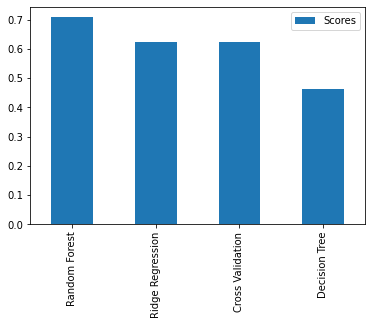

In [46]:
df_models.plot(kind='bar');

## Conclusion

As such the RandomForest Regression model performs the best in terms of the R2 score metric while the DecisionTree the worst. The possible overfitting in the DecisionTree contributes to its low performance.

## Univariate Linear Regression

In [54]:
#predict median house price based on median income

#extracting median income

df2 = df1[:]
x_income = df2['median_income']
y_income = df2['median_house_value']
y_income

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20640, dtype: int64

In [59]:
sc2 = StandardScaler()
x_income_scaled = sc2.fit_transform(x_income.values.reshape(-1,1))
y_income_scaled = sc2.fit_transform(y_income.values.reshape(-1,1))

In [60]:
x_train_income, x_test_income,y_train_income, y_test_income = train_test_split(x_income_scaled, y_income_scaled, test_size=0.2, random_state=1)

In [61]:
lr2 = LinearRegression()
lr2.fit(x_train_income,y_train_income)

LinearRegression()

In [62]:
y_pred_income = lr2.predict(x_test_income) #getting some predicted values
y_pred_income

array([[-0.22058345],
       [-0.68402407],
       [ 0.05756838],
       ...,
       [ 0.43470612],
       [ 0.37165546],
       [-0.41906549]])

In [63]:
print("The test score is: ", r2_score(y_test_income, y_pred_income))
print("The training score is: ", r2_score(y_train, lr2.predict(x_train_income)))

The test score is:  0.47190835934467734
The training score is:  0.47361041135543247


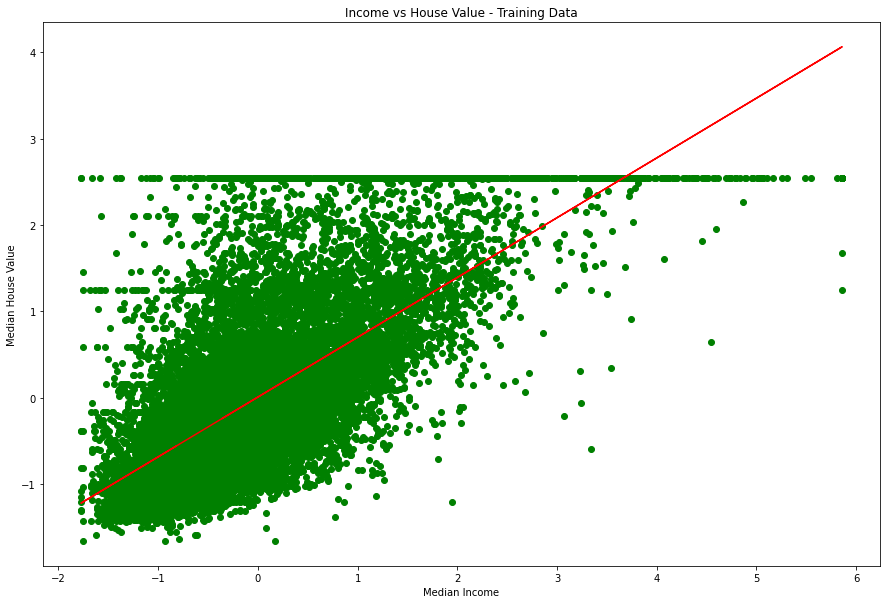

In [78]:
plt.figure(figsize=(15,10))
plt.scatter(x_train_income, y_train_income, color = 'green')
plt.plot (x_train_income, 
          lr2.predict(x_train_income), color = 'red')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Income vs House Value - Training Data')
plt.savefig('income_vs_value.jpg');

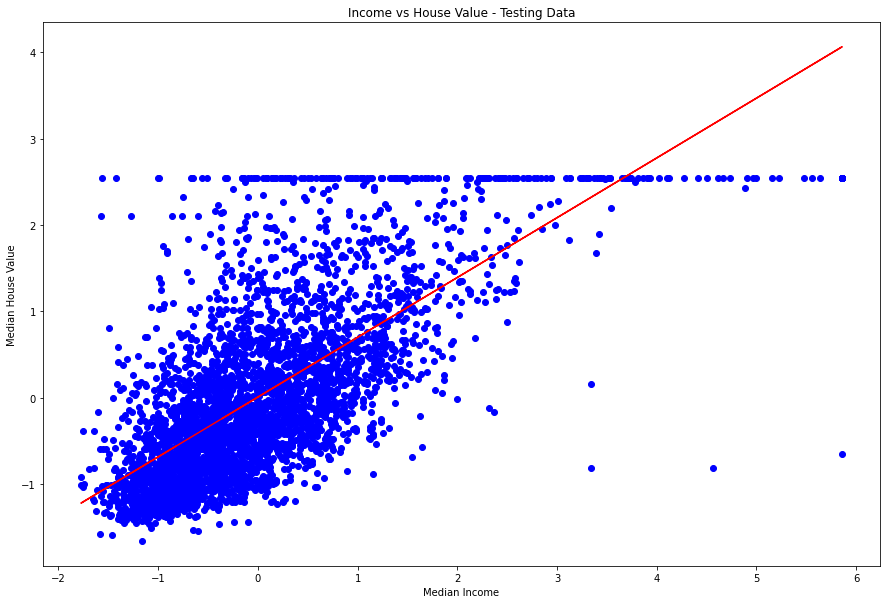

In [80]:
plt.figure(figsize=(15,10))
plt.scatter(x_test_income, y_test_income, color = 'blue')
plt.plot (x_train_income, 
          lr2.predict(x_train_income), color = 'red')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Income vs House Value - Testing Data')
plt.savefig('income_vs_value_test.jpg');